In [2]:
import xml.etree.ElementTree as ET
import glob
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ET.parse('D:\\xml_lab_pro\\coco_xml\\-135_rotated_8d564c93db38d901c588ddaa9c2078b8.xml')


In [3]:
from glob_rotate_with_xml import rotate_xml,computeRotateBox

In [24]:
tree  = ET.parse('hodlers.xml')
root = tree.getroot()
print(ET.tostring(root))

b'<crypto coin="Money" launch="202110101">\n    <event>Day</event>\n    <investor id="0">\n        <name>Viet Nguyen</name>\n    </investor>\n    <investor id="1">Harry Potter</investor>\n    <investor id="2">Uchiha Sasuke</investor>\n    <investor id="3">Donald Trump</investor>\n    <investor id="4">Vladimir Putin</investor>\n    <investor id="5">Cristiano Ronaldo</investor>\n    <investor id="6">Allen Duff</investor>\n    <investor id="7">Karl Amber</investor>\n</crypto>'


In [17]:
event = tree.find('event')
event.text = event.text.replace(event.text,'Day')
tree.write('hodlers.xml')


In [25]:
imposter = ET.Element('imposter')
imposter.text = 'Among Us'
root.insert(2,imposter)
# ET.dump(root)
tree.write('hodlers.xml')


In [6]:
root.set('launch','202110101')

In [7]:
tree.write('hodlers.xml')

In [8]:
id = 1
for investor in tree.findall('investor'):
    investor.set('id',str(id))
    id += 1

In [9]:
tree.write('hodlers.xml')

In [10]:
for investor in tree.findall('investor'):
    del(investor.attrib['id'])

In [12]:
tree.write('hodlers.xml')

In [13]:
investor1  = ET.fromstring("<investor>Allen Duff</investor>")
root.append(investor1)

In [14]:
tree.write('hodlers.xml')

In [15]:
investor2 = ET.Element('investor')
investor2.text = 'Karl Amber'
root.append(investor2)
tree.write('hodlers.xml')

In [16]:
for (id,investor) in enumerate(root.findall('investor')):
    investor.set('id',str(id))
tree.write('hodlers.xml')

In [18]:
investor = root.find('.//investor[@id="4"]')

In [19]:
print(investor.text)

Vladimir Putin


In [34]:
for investor in tree.findall('investor'):
    try:
        money = investor.find('money').text
        if int(money) > 1000:
            investor.remove(investor.find('money'))
    except AttributeError:
        pass

In [35]:
tree.write('hodlers.xml')

In [40]:
removal = ['tmp_left','card_old','card_new']
for xml_file in glob.glob('Annotations/front_crop/*.xml'):
    tree  = ET.parse(xml_file)
    root = tree.getroot()
    for object in tree.findall('object'):
        name = object.find('name').text
        if name in removal:
            root.remove(object)
    tree.write(xml_file)

In [3]:
img_paths = glob.glob('D:\\image\\ekycerror\\front_crop\\*.png')+glob.glob('D:\\image\\ekycerror\\front_crop\\*.jpg')

In [4]:
img_paths[650:700]

['D:\\image\\ekycerror\\front_crop\\tunn_part3_1590987939911IMG_20200601_120538.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591070330133IMG_20200602_105848.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591188976112IMG_20200603_195613.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591350939975IMG_20200605_165538.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591359043378IMG_20200605_191038.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591363436386IMG_20200605_202356.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591366609360IMG_20200605_211647.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591452972432IMG_20200606_211604.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591461040250IMG_20200606_233039.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591671983850IMG_20200609_100621.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591672928078IMG_20200609_102205.jpg',
 'D:\\image\\ekycerror\\front_crop\\tunn_part3_1591678

In [11]:
xml_paths = glob.glob('front_valid_16_6/Annotations/*.xml')

In [12]:
xml_paths

['front_valid_16_6/Annotations\\00d2cddf49b70053d4a12b5fc7160752.xml',
 'front_valid_16_6/Annotations\\05d321fa77dffafbcfc330fa73e3b766.xml',
 'front_valid_16_6/Annotations\\05de5e5b0b3ea651a5727ebf05d1ed83.xml',
 'front_valid_16_6/Annotations\\06c4c3a8e2c3ad16a4b2f997c71d5fc8.xml',
 'front_valid_16_6/Annotations\\070a051b57749b5194d64db5addb0798.xml',
 'front_valid_16_6/Annotations\\076cb43d59022621dcc5a00fb01697d7.xml',
 'front_valid_16_6/Annotations\\077df772938761ccdc3815580563ce4f.xml',
 'front_valid_16_6/Annotations\\08ff91b42f4a5614026b455b70c03462.xml',
 'front_valid_16_6/Annotations\\0a0e933bc73e000da75115490d303a51.xml',
 'front_valid_16_6/Annotations\\0a2f57eeee1d2f92be3e291f55626736.xml',
 'front_valid_16_6/Annotations\\0a62edfeca25d32827081bc1bb7c2be6.xml',
 'front_valid_16_6/Annotations\\0ade257b9f75cb58c84a8a7e02799b5a.xml',
 'front_valid_16_6/Annotations\\0b0db7116aacf6324cadc173cbcd0645.xml',
 'front_valid_16_6/Annotations\\0b6fb86e06de9e52c09098797eb56476.xml',
 'fron

In [46]:
tree = ET.parse('Annotations/front_crop/img_271.xml')
root = tree.getroot()

In [47]:
imposter = ET.Element('imposter')
imposter.text = 'Among Us'
root.insert(2,imposter)
tree.write('Annotations/front_crop/img_271.xml')

In [33]:
a = tree.find('imposter')
a.text

'Among Us'

In [5]:
img_paths_relative = []
for img_path in glob.glob('front_valid_16_6/images/*.png')+glob.glob('front_valid_16_6/images/*.jpg'):
    path = os.path.split(img_path)[-1]
    img_paths_relative.append(path)

In [13]:
for xml_file in xml_paths:
    removal = ['tmp_left','card_old','card_new']
    extensions = ['.png','.PNG','.jpg','.JPG']
    tree  = ET.parse(xml_file)
    root = tree.getroot()
    filename = tree.find('filename')
    name = tree.find('filename').text
    for extension in extensions:

        if os.path.split(name)[-1] + extension in img_paths_relative:
            # print(os.path.split(name)[-1] + extension in img_paths_relative)
            filename.text = filename.text.replace(filename.text,os.path.split(name)[-1] + extension)
            tree.write(xml_file)
    path = ET.Element('path')
    path.text = filename.text
    root.insert(2,path)
    tree.write(xml_file) 
    objects = tree.findall('object')
    for object in objects:
        name = object.find('name').text
        if name in removal:
            root.remove(object)
    tree.write(xml_file)
        

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [6]:
def rotate_img(image_path, angle=0):
    # print(dst_img_path)
    # load the image and show it
    # cv2.imshow("Original", image)
    # grab the dimensions of the image and calculate the center of the
    # image
    img_name = os.path.split(image_path)[-1]
    image = cv2.imread(image_path)
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # rotate our image by 45 degrees around the center of the image
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    rotated = cv2.warpAffine(image, M, (nW, nH))
    plt.imshow(cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB))
    # cv2.imshow("Rotated", rotated)
    # cv2.waitKey(0)
    
    cv2.imwrite(f"augument_img/{str(angle)}_rotated_{img_name}", rotated)
    rotated_name = os.path.split(f"augument_img/{str(angle)}_rotated_{img_name}")[-1]
    return rotated_name,M

In [7]:
def get_coor_rotate(v,M_rot):
  '''
  Get new coordinate after rotated
  '''
  calculated = np.dot(M_rot,v)
  (new_x,new_y) = (calculated[0],calculated[1])
  return (int(new_x),int(new_y))

In [8]:
def rotate_xml(xml_path, M_rot, angle):

    tree = ET.parse(xml_path)
    xmlroot = tree.getroot()
    img_name,extension = xmlroot.find('filename').text.split('.')[0],xmlroot.find('filename').text.split('.')[-1]
    # filename = xmlroot.find('filename')
    # filename.text = img_name

    # filepath = xmlroot.find('path')
    # if filepath:
    #     filepath.text = img_name

    for object in xmlroot.findall('object'):
        name = object.find('name')
        bndbox = object.find('bndbox')
        box = [int(bndbox.find('xmin').text), int(bndbox.find('ymin').text),
               int(bndbox.find('xmax').text), int(bndbox.find('ymax').text)]
        new_xmin, new_ymin = get_coor_rotate([box[0],box[1],1],M_rot)
        new_xmax, new_ymax = get_coor_rotate([box[2],box[3],1],M_rot)
        
        if new_xmin > new_xmax :
            new_xmin,new_xmax = new_xmax,new_xmin
        if new_ymin > new_ymax:
            new_ymin,new_ymax  = new_ymax,new_ymin
        delta_x = new_xmax - new_xmin
        delta_y = new_ymax - new_ymin
        if (name.text in ['center_new','center_old','tmp_right','tmp_left_hc','tmp_right_hc']) and (angle in [-5,5,-175,175,85,-85,95,-95]):
            # if angle in [-85,-175,5,95]:
                if delta_x > delta_y:
                    new_ymin = new_ymin - int((1/7)*delta_y)
                    new_ymax = new_ymax + int((1/7)*delta_y)
                if delta_x < delta_y:
                    new_xmin = new_xmin - int((1/7)*delta_x)
                    new_xmax = new_xmax + int((1/7)*delta_x)
        if (name.text in ['center_new','center_old','tmp_right','tmp_left_hc','tmp_right_hc']) and (angle in [45,-45,135,-135]):
            if delta_x > delta_y:
                new_ymin = new_ymin - int((1/3)*delta_x)
                new_ymax = new_ymax + int((1/3)*delta_x)
            if delta_x < delta_y:
                new_xmin = new_xmin - int((1/3)*delta_y)
                new_xmax = new_xmax + int((1/3)*delta_y)
        if (name.text in ['center_new','center_old','tmp_right','tmp_left_hc','tmp_right_hc']) and (angle in [15]):
            if delta_x > delta_y:
                new_ymin = new_ymin - int((1/7)*delta_x)
                new_ymax = new_ymax + int((1/7)*delta_x)
            if delta_x < delta_y:
                new_xmin = new_xmin - int((1/7)*delta_y)
                new_xmax = new_xmax + int((1/7)*delta_y)
            if name.text == 'center_old':
                new_xmin = new_xmin + int((1/7)*(new_ymax-new_ymin))
                new_xmax = new_xmax - int((1/7)*(new_ymax-new_ymin))
        if (name.text in ['center_new','center_old','tmp_right','tmp_left_hc','tmp_right_hc']) and (angle in [-15]):
            if delta_x > delta_y:
                new_ymin = new_ymin - int((1/7)*delta_x)
                new_ymax = new_ymax + int((1/7)*delta_x)
            if delta_x < delta_y:
                new_xmin = new_xmin - int((1/7)*delta_y)
                new_xmax = new_xmax + int((1/7)*delta_y)

        if name.text in ['chip','hc'] and (angle in [5,-5,85,-85,95,-95,-175,175]):
            new_ymin = new_ymin - int((1/9)*delta_y)
            new_ymax = new_ymax + int((1/9)*delta_y)
            new_xmin = new_xmin - int((1/9)*delta_x)
            new_xmax = new_xmax + int((1/9)*delta_x)
        if name.text in ['chip','hc'] and (angle in [45,-135]):
            new_ymin = new_ymin - int((1/2)*delta_x)
            new_ymax = new_ymax + int((1/2)*delta_x)
        if name.text in ['chip','hc'] and (angle in [-45,135]):
            new_xmin = new_xmin - int((1/2)*delta_y)
            new_xmax = new_xmax + int((1/2)*delta_y)
        if name.text in ['chip','hc'] and (angle in [15]):
            new_ymin = new_ymin - int((1/5)*delta_x)
            new_ymax = new_ymax + int((1/5)*delta_x)
        if name.text in ['chip','hc'] and (angle in [-15]):
            new_xmin = new_xmin - int((1/5)*delta_y)
            new_xmax = new_xmax + int((1/5)*delta_y)    
        if (name.text in ['tmp_mid_left','tmp_bottom_left','tmp_mid_left_hc','tmp_bottom_left_hc']) and (angle in [45,-135]):
            new_ymin = new_ymin - int((1/3)*delta_x)
            new_ymax = new_ymax + int((1/3)*delta_x)
        if (name.text in ['tmp_mid_left','tmp_bottom_left','tmp_mid_left_hc','tmp_bottom_left_hc']) and (angle in [-45,135]):
            new_xmin = new_xmin - int((1/3)*delta_y)
            new_xmax = new_xmax + int((1/3)*delta_y)
        if (name.text in ['tmp_mid_left','tmp_bottom_left','tmp_mid_left_hc','tmp_bottom_left_hc']) and (angle in [15,-15]):
            new_ymin = new_ymin - int((1/5)*delta_x)
            new_ymax = new_ymax + int((1/5)*delta_x)
        xmin = bndbox.find('xmin')
        xmin.text = str(new_xmin)
        ymin = bndbox.find('ymin')
        ymin.text = str(new_ymin)
        xmax = bndbox.find('xmax')
        xmax.text = str(new_xmax)
        ymax = bndbox.find('ymax')
        ymax.text = str(new_ymax)
    dst_xml_path = f"augument_xml/{str(angle)}_rotated_{img_name}.xml"
    tree.write(dst_xml_path)
    rotate_tree = ET.parse(dst_xml_path)
    rotated_root = rotate_tree.getroot()
    filename = rotated_root.find('filename')
    filename.text = f"{str(angle)}_rotated_{img_name}.{extension}"
    path = rotated_root.find('path')
    path.text = f"{str(angle)}_rotated_{img_name}.{extension}"
    rotate_tree.write(dst_xml_path)

    


In [18]:
name1 = 'img_146'
name2 = 'cccd_tunn_part2_img_613'
name3 = '95529371f87b63ec0adbfb05b6092984'
name4 = 'e1a4db3003c2d77913cce18e4e43231f'
name5 = '450_HC_0003'
name6 = '450_HC_0006'
name7 = '450_IMG_0337'

In [9]:
hc = [path for path in img_paths if 'hc' in path or 'HC' in path or 'IMG' in path]

In [10]:
len(hc)

247

1/50
2/50
3/50
4/50
5/50
6/50
7/50
8/50
9/50
10/50
11/50
12/50
13/50
14/50
15/50
16/50
17/50
18/50
19/50
20/50
21/50
22/50
23/50
24/50
25/50
26/50
27/50
28/50
29/50
30/50
31/50
32/50
33/50
34/50
35/50
36/50
37/50
38/50
39/50
40/50
41/50
42/50
43/50
44/50
45/50
46/50
47/50


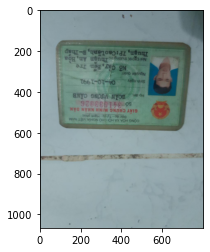

In [11]:
i = 0
for img_path in hc[200:]:                 
    i = i + 1
    short_name, extension = os.path.split(img_path)[-1].split('.')[0],os.path.split(img_path)[-1].split('.')[-1]
    for angle in [-135, -90, -45, -15, -5, 5, 15, 45, 90, 135, 180]:
        rotated_name,M=rotate_img(f"images/front_crop/{short_name}.{extension}",angle)
        rotate_xml(f"Annotations/front_crop/{short_name}.xml",M,angle)
    print(f"{i}/50")

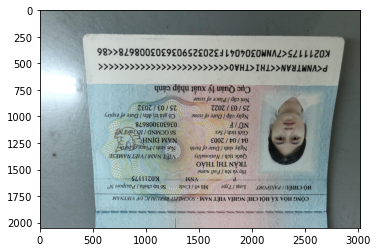

In [20]:
for angle in [-135, -90, -45, -15, -5, 5, 15, 45, 90, 135, 180]:
        rotated_name,M=rotate_img(f"images/front_crop/{name7}.JPG",angle)
        rotate_xml(f"Annotations/front_crop/{name7}.xml",M,angle)

In [ ]:
for xml_path in glob.glob('Annotations/front_crop/*.xml')[0:100]:
    tree  = ET.parse(xml_path)
    root = tree.getroot()
    filename = tree.find('filename')
    filename = tree.find('filename').text
    short_name,extension = filename.split('.')[0],filename.split('.')[-1]
    angles = [0,5,-5,90,-90,180,175,-175]
    for angle in angles:
        rotated_name,M=rotate_img(f"images/front_crop/{short_name}.{extension}",angle)
        rotate_xml(f"Annotations/front_crop/{short_name}.xml",M,angle)
            
    

In [ ]:
# def rotate_image(original_image,points_to_rotate_info,show_img = False):
#   (w,h) = (original_image.shape[1],original_image.shape[0])
#   (cx,cy) = (w//2,h//2)
#   M_rot = get_rotattion_matrix(original_image,points_to_rotate_info)
#   cos = np.abs(M_rot[0, 0])
#   sin = np.abs(M_rot[0, 1])
#   nW = int((h * sin) + (w * cos))
#   nH = int((h * cos) + (w * sin))
#   M_rot[0, 2] += (nW / 2) - cx
#   M_rot[1, 2] += (nH / 2) - cy
#   rotated = cv2.warpAffine(original_image,M_rot,(nW,nH))
#   if show_img:
#     plt.figure(figsize = (40,20))
#     plt.imshow(cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB))
#   return rotated,M_rot